### Data Engineering

In [1]:
import pandas as pd
import json as json
import glob as glob

In [2]:
files= glob.glob("data/*.json")

In [3]:
files

['data/8_4.json',
 'data/8_8.json',
 'data/8_9.json',
 'data/9_11.json',
 'data/8_10.json',
 'data/9_7.json',
 'data/9_10.json',
 'data/6_16.json',
 'data/9_8.json',
 'data/9_4.json',
 'data/9_13.json',
 'data/9_12.json',
 'data/9_5.json',
 'data/9_9.json',
 'data/9_2.json',
 'data/8_14.json',
 'data/6_11.json',
 'data/8_15.json',
 'data/8_7.json']

In [4]:
files[1].split("/")[1]

'8_8.json'

In [5]:
for i,file in enumerate(files):
    with open(file, 'r') as f:
        data = json.load(f)
        if i ==0:
            df = pd.DataFrame(data)
        else:
            idf = pd.DataFrame(data)
            df = pd.concat([df,idf])

In [ ]:
df.shape

(59623, 10)

In [ ]:
df.to_csv("alldata.csv")

In [8]:
IDs= df['Uniprot_AC'].unique()
len(IDs)


15455

In [29]:
IDs

array(['Q61598', 'Q9QXS1', 'P11983', ..., 'D3Z656', 'E9Q7S0', 'F7BQW7'],
      dtype=object)

In [30]:
import pandas as pd, requests
import json


def get_short_full_names(names, section_key, section_values):
    '''
    FUNCTION:
    - Get all names from an entry
    
    PARAMS:
    - names (list)
    '''
    # Full name
    if section_key == 'fullName':
        name = section_values['value']
        names.append(name)

    # Short names
    if section_key == 'shortNames':
        for entry in section_values:
            name = entry['value']
            names.append(name)  
            
    # EC Numbers
    if section_key == 'ecNumbers':
         for entry in section_values:
            name = entry['value']
            names.append(name) 
            
    return names

In [ ]:
id2names = dict()
for key,value in id2syns.items():
    #print(key,value)
    id2names[key] = value[0]

In [ ]:
id2names

In [ ]:
df['pname'] = df['Uniprot_AC'].map(id2names)

In [9]:
df

,Organism,Uniprot_AC,position,standard_seq,PTM_Catalogy,PTM_Type,ref,cell_line,Identification_Strategy,Identification_Technique
0,Mus musculus,Q61598,317,EKVGQVIRVICILSHPIKNTNDANSCQIIIPQNQVNRKSDIYVCMI...,Oxidation PTM,S-nitrosylation,28710281,Ischemia heart cells,Thiol isotope labeling,SNOxICAT
1,Mus musculus,Q61598,414,PKDLGTDSQIFISRAYDATTHFETTCDDIKDIYKRMTGSEFDFEEM...,Oxidation PTM,S-nitrosylation,28710281,Ischemia heart cells,Thiol isotope labeling,SNOxICAT
2,Mus musculus,Q61598,302,CKQLICDPSYVKDRVEKVGQVIRVICILSHPIKNTNDANSCQIIIP...,Oxidation PTM,S-nitrosylation,28710281,Ischemia heart cells,Thiol isotope labeling,SNOxICAT
3,Mus musculus,Q9QXS1,4078,LQLQEGLTSIEEVTKNLQKFLEGTSCIAGVFVDATKERLSVYQAMK...,Oxidation PTM,S-nitrosylation,28710281,Ischemia heart cells,Thiol isotope labeling,SNOxICAT
4,Mus musculus,Q9QXS1,958,AKAIVQLKPRNPAHPVRGHVPLIAVCDYKQVEVTVHKGDQCQLVGP...,Oxidation PTM,S-nitrosylation,28710281,Ischemia heart cells,Thiol isotope labeling,SNOxICAT
...,...,...,...,...,...,...,...,...,...,...
3968,Mus musculus,D6REF3,98,KGGEDKLKMIREYRQMVETELKLICCDILDVLDKHLIPAANTGWQK...,Lipid PTM,S-palmitoylation,28680068,Forebrain cells,Thiol blocking,ABE
3969,Mus musculus,D3Z656,1091,LPQHLQPSSSSGLGTSPSSSPRTSPCQSPTVPEYSAPSLPIRPSRA...,Lipid PTM,S-palmitoylation,28680068,Forebrain cells,Thiol blocking,ABE
3970,Mus musculus,E9Q7S0,1051,LPQHLQPSSSSGLGTSPSSSPRTSPCQSPTVPEYSAPSLPIRPSRA...,Lipid PTM,S-palmitoylation,28680068,Forebrain cells,Thiol blocking,ABE
3971,Mus musculus,F7BQW7,1066,LPQHLQPSSSSGLGTSPSSSPRTSPCQSPTVPEYSAPSLPIRPSRA...,Lipid PTM,S-palmitoylation,28680068,Forebrain cells,Thiol blocking,ABE


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59623 entries, 0 to 3972
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Organism                  59623 non-null  object
 1   Uniprot_AC                59623 non-null  object
 2   position                  59623 non-null  int64 
 3   standard_seq              59623 non-null  object
 4   PTM_Catalogy              59623 non-null  object
 5   PTM_Type                  59623 non-null  object
 6   ref                       59623 non-null  object
 7   cell_line                 59623 non-null  object
 8   Identification_Strategy   59623 non-null  object
 9   Identification_Technique  59623 non-null  object
dtypes: int64(1), object(9)
memory usage: 5.0+ MB


In [11]:
df.head(1)

,Organism,Uniprot_AC,position,standard_seq,PTM_Catalogy,PTM_Type,ref,cell_line,Identification_Strategy,Identification_Technique
0,Mus musculus,Q61598,317,EKVGQVIRVICILSHPIKNTNDANSCQIIIPQNQVNRKSDIYVCMI...,Oxidation PTM,S-nitrosylation,28710281,Ischemia heart cells,Thiol isotope labeling,SNOxICAT


In [12]:
df.tail(1)

,Organism,Uniprot_AC,position,standard_seq,PTM_Catalogy,PTM_Type,ref,cell_line,Identification_Strategy,Identification_Technique
3972,Mus musculus,Q8CHC4,1051,LPQHLQPSSSSGLGTSPSSSPRTSPCQSPTVPEYSAPSLPIRPSRA...,Lipid PTM,S-palmitoylation,28680068,Forebrain cells,Thiol blocking,ABE


In [13]:
All_PTM_Type = df['PTM_Type'].unique()

In [14]:
print (All_PTM_Type)

['S-nitrosylation' 'S-glutathionylation' 'S-persulfidation'
 'S-sulfinylation' 'S-succination' 'S-palmitoylation' 'S-sulfonylation'
 'S-prenylation' 'S-disulfidation' 'S-sulfenylation' 'S-carbonylation'
 'S-itaconation' 'S-oxidation(nec.)']


In [12]:
organism_type = df['Organism'].unique()

In [59]:
print (organism_type)

['Mus musculus' 'Homo sapiens' 'Rattus norvegicus']


In [13]:
df['Organism'].value_counts()

Mus musculus         40109
Homo sapiens         19336
Rattus norvegicus      178
Name: Organism, dtype: int64

In [14]:
df['PTM_Type'].value_counts()

S-oxidation(nec.)      26924
S-nitrosylation        10743
S-glutathionylation     6556
S-palmitoylation        5633
S-sulfenylation         3438
S-persulfidation        2271
S-itaconation           1117
S-succination           1024
S-carbonylation          657
S-disulfidation          607
S-sulfinylation          473
S-prenylation             91
S-sulfonylation           89
Name: PTM_Type, dtype: int64

<AxesSubplot:>

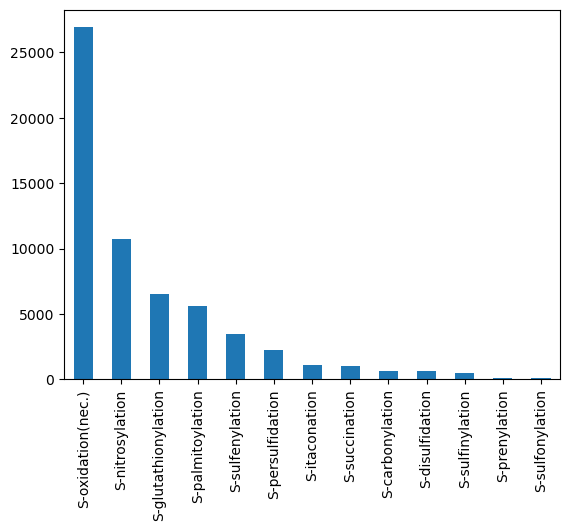

In [15]:
df['PTM_Type'].value_counts().plot(kind='bar')

<AxesSubplot:>

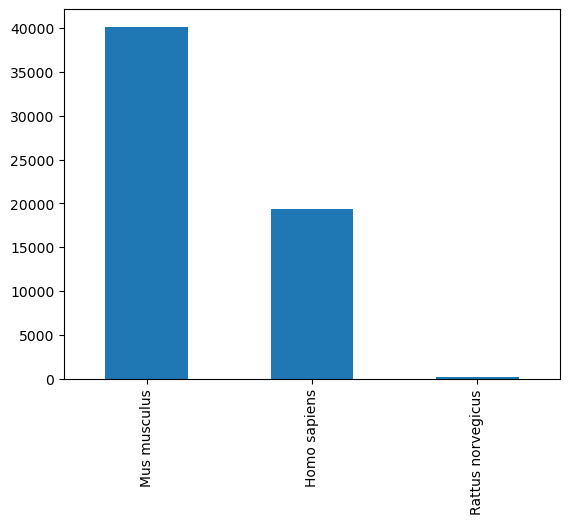

In [16]:
df['Organism'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Organism'>

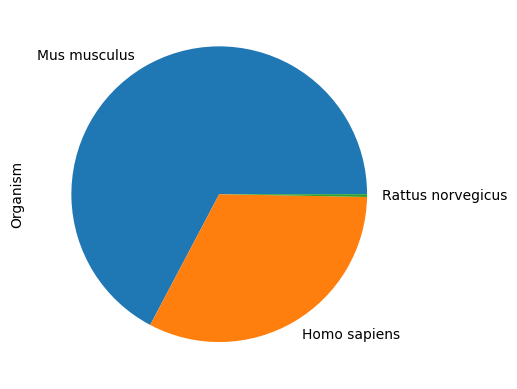

In [17]:
df['Organism'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='PTM_Type'>

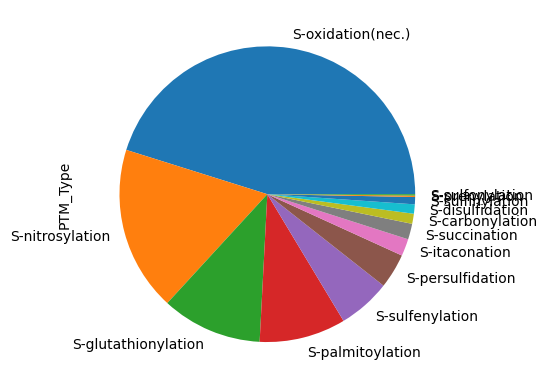

In [18]:
df['PTM_Type'].value_counts().plot(kind='pie')

In [ ]:
# convert dataframe to dictionary
df_dict = df.to_dict(orient='records')

In [ ]:
df_dict[0]

{'Organism': 'Mus musculus',
 'Uniprot_AC': 'Q61598',
 'position': 317,
 'standard_seq': 'EKVGQVIRVICILSHPIKNTNDANSCQIIIPQNQVNRKSDIYVCMISFAHN',
 'PTM_Catalogy': 'Oxidation PTM',
 'PTM_Type': 'S-nitrosylation',
 'ref': '28710281',
 'cell_line': 'Ischemia heart cells',
 'Identification_Strategy': 'Thiol isotope labeling',
 'Identification_Technique': 'SNOxICAT'}

In [ ]:
#save df_dict to json file
with open('data.json', 'w') as f:
    json.dump(df_dict, f)